In [1]:
# import the libraries as shown below
import tensorflow
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [8]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'photo_data/train'
valid_path = 'photo_data/test'

In [9]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [10]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [11]:
# useful for getting number of output classes
folders = glob('photo_data/train/*')

In [12]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [13]:
prediction = Dense(len(folders), activation='softmax')(x)

#Making a model
model = Model(inputs=resnet.input, outputs=prediction)

In [14]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [16]:
# Model csot and optmization methods
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [17]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('photo_data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1008 images belonging to 3 classes.


In [19]:
test_set = test_datagen.flow_from_directory('photo_data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 89 images belonging to 3 classes.


In [20]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\Marmik\AppData\Local\Temp\ipykernel_18672\4102162479.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
32/32 [==============================] - 61s 2s/step - loss: 2.7664 - accuracy: 0.4742 - val_loss: 1.5435 - val_accuracy: 0.4719
Epoch 2/50
32/32 [==============================] - 65s 2s/step - loss: 0.8867 - accuracy: 0.6210 - val_loss: 0.7729 - val_accuracy: 0.6517
Epoch 3/50
32/32 [==============================] - 75s 2s/step - loss: 0.7292 - accuracy: 0.7073 - val_loss: 0.7244 - val_accuracy: 0.7303
Epoch 4/50
32/32 [==============================] - 76s 2s/step - loss: 0.9208 - accuracy: 0.6359 - val_loss: 0.7387 - val_accuracy: 0.7191
Epoch 5/50
32/32 [==============================] - 466s 15s/step - loss: 0.7624 - accuracy: 0.6716 - val_loss: 1.0188 - val_accuracy: 0.5955
Epoch 6/50
32/32 [==============================] - 61s 2s/step - loss: 0.6898 - accuracy: 0.7034 - val_loss: 0.6639 - val_accuracy: 0.7416
Epoch 7/50
32/32 [==============================] - 73s 2s/step - loss: 0.7474 - accuracy: 0.6875 - val_loss: 1.7569 - val_accuracy: 0.5281
Epoch 8/50
32/32 [

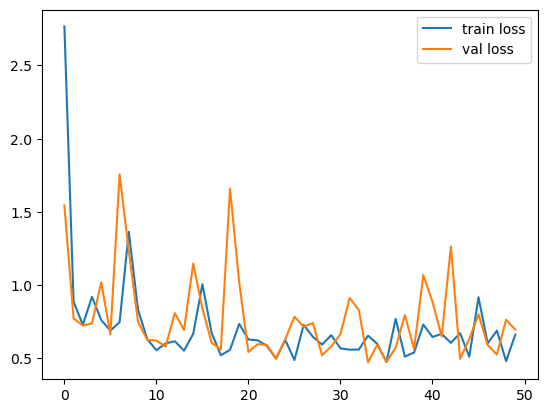

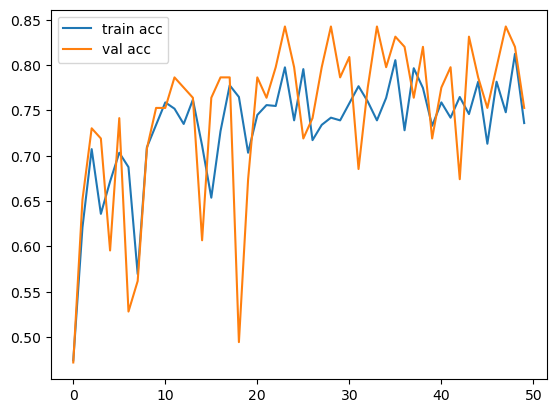

<Figure size 640x480 with 0 Axes>

In [21]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
# save it as h5 file

from tensorflow.keras.models import load_model
model.save('model_resnet50.h5')

In [23]:
y_pred = model.predict(test_set)

3/3 [==============================] - 7s 2s/step


In [17]:
y_pred

array([[1.12255216e-02, 2.18407353e-04, 9.88556087e-01],
       [9.95627999e-01, 1.69646755e-05, 4.35500965e-03],
       [5.04433865e-06, 9.99994874e-01, 1.05844791e-07],
       [6.46931585e-03, 9.92197335e-01, 1.33341365e-03],
       [9.83523905e-01, 5.42194175e-04, 1.59340221e-02],
       [6.58550501e-01, 8.79029467e-05, 3.41361672e-01],
       [2.78141111e-01, 3.65421329e-05, 7.21822381e-01],
       [2.31642485e-01, 9.54852998e-03, 7.58808970e-01],
       [4.86501396e-01, 3.45965373e-06, 5.13495147e-01],
       [9.93858397e-01, 1.07994296e-04, 6.03356585e-03],
       [1.16580464e-02, 5.97114500e-04, 9.87744868e-01],
       [3.63634437e-01, 6.15047276e-01, 2.13182345e-02],
       [3.65680963e-01, 1.02786682e-04, 6.34216249e-01],
       [2.35108819e-05, 9.99971867e-01, 4.59947478e-06],
       [7.25852728e-01, 2.53466755e-01, 2.06805132e-02],
       [3.01777329e-02, 9.60101128e-01, 9.72120464e-03],
       [1.53967282e-02, 9.51439215e-05, 9.84508157e-01],
       [9.99646902e-01, 2.64431

In [24]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [25]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0,
       0, 0, 2, 2, 1, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 2,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 2, 2, 1, 0,
       0, 1, 0, 2, 0, 2, 0, 1, 1, 0, 2, 2, 0, 2, 1, 0, 1, 1, 2, 2, 0, 1,
       2], dtype=int64)

In [26]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [27]:
model = load_model('model_resnet50.h5')

In [33]:
img_data

array([[[[-103.06841 , -116.033905, -122.985886],
         [-103.06057 , -115.96723 , -122.91921 ],
         [-103.00959 , -115.869194, -122.76627 ],
         ...,
         [-103.519394, -116.6692  , -123.67608 ],
         [-103.50763 , -116.64959 , -123.67608 ],
         [-103.50371 , -116.65743 , -123.67216 ]],

        [[-103.0841  , -116.02213 , -123.00157 ],
         [-103.09586 , -116.06528 , -123.0251  ],
         [-103.04488 , -115.900566, -122.80549 ],
         ...,
         [-103.523315, -116.67312 , -123.68    ],
         [-103.50763 , -116.64959 , -123.67608 ],
         [-103.50763 , -116.661354, -123.67608 ]],

        [[-102.98214 , -115.82998 , -122.73098 ],
         [-103.127235, -116.21037 , -123.22902 ],
         [-103.00959 , -115.91233 , -122.86039 ],
         ...,
         [-103.523315, -116.665276, -123.67216 ],
         [-103.519394, -116.661354, -123.668236],
         [-103.519394, -116.65743 , -123.67216 ]],

        ...,

        [[-103.939   , -116.67704 , -1

In [28]:
img=image.load_img('photo_data/Test/Sky/6307191.jpg',target_size=(224,224))


In [29]:
x = image.img_to_array(img)
x

array([[[177., 190., 222.],
        [194., 207., 224.],
        [233., 232., 237.],
        ...,
        [  1.,  28., 107.],
        [  1.,  33., 110.],
        [  2.,  31., 111.]],

       [[173., 193., 218.],
        [167., 182., 215.],
        [223., 224., 228.],
        ...,
        [  0.,  27., 106.],
        [  1.,  33., 110.],
        [  1.,  30., 110.]],

       [[242., 242., 244.],
        [115., 145., 207.],
        [209., 221., 237.],
        ...,
        [  2.,  29., 106.],
        [  3.,  30., 107.],
        [  2.,  31., 107.]],

       ...,

       [[  1.,  26.,   0.],
        [  7.,  38.,   4.],
        [ 12.,  45.,   0.],
        ...,
        [  5.,  10.,   6.],
        [  3.,   8.,   4.],
        [  1.,   8.,   1.]],

       [[  0.,  16.,   0.],
        [ 10.,  39.,   8.],
        [ 17.,  49.,   2.],
        ...,
        [  0.,   6.,   2.],
        [  4.,  14.,   3.],
        [  5.,  10.,   4.]],

       [[  6.,  21.,   0.],
        [  4.,  33.,   2.],
        [ 12.,  

In [30]:
x.shape

(224, 224, 3)

In [31]:
x=x/255

In [32]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [34]:
model.predict(img_data)

1/1 [==============================] - 1s 1s/step


array([[1.4360620e-08, 9.5672053e-01, 4.3279424e-02]], dtype=float32)

In [35]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 176ms/step


In [36]:
a==1

array([ True])